<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.interpolate import interp1d

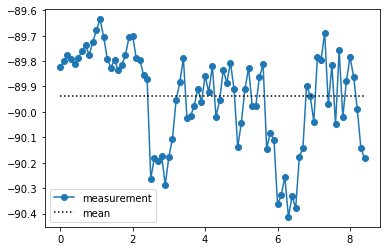

In [2]:
noisefile = glob.glob('data_plots/pos2/F33_pwr__noisefloor.pkl')
noisedata = pickle.load(open(noisefile[0],'rb'))
expnoise_raw = noisedata.iloc[len(noisedata)//2]
xx, yy = expnoise_raw.axes[0].values, expnoise_raw.values
# Linearize noise floor
yylin = 10**(yy/10) # from dBm to mW
expnoisemean = np.mean(yylin) # in mW
expnoisemean_log = 10*np.log10(expnoisemean) # from mW to dBm
expnoisef = interp1d(xx,yy)
plt.plot(xx,yy,'o-',label='measurement')
plt.plot([min(xx),max(xx)],[expnoisemean_log,expnoisemean_log],'k:',label='mean')
plt.legend(loc='lower left')

In [3]:
pklfiles = glob.glob('data_processed/Duffing/JJarrayCPW*.pkl')

In [4]:
itheo = np.array([])
xtheo = np.array([])
ytheo = np.array([])
xtheo2 = np.array([])
ytheo2 = np.array([])
betas = np.array([])
nphot = np.array([])
nphot2 = np.array([])

for myfile in pklfiles:
    print('Importing from ',myfile)
    expdata = pickle.load(open(myfile,'rb'))
    itheo = np.append(itheo,[expdata['Iset (A)']]*len(expdata['xtheo']))
    xtheo = np.append(xtheo,expdata['xtheo'])
    ytheo = np.append(ytheo,expdata['ytheo'])
    xtheo2 = np.append(xtheo2,expdata['xtheo2'])
    ytheo2 = np.append(ytheo2,expdata['ytheo2'])
    betas = np.append(betas,expdata['Beta (Hz)'])
    nphot = np.append(nphot,expdata['nphot'])
    nphot2 = np.append(nphot2,expdata['nphot2'])

l = expdata['l']
N = expdata['N']

Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0000.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0100.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0200.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0300.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0400.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0500.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0600.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0700.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0800.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_0900.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_1000.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_1100.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_1200.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_1300.pkl
Importing from  data_processed/Duffing/JJarrayCPW_1.0_845_1400

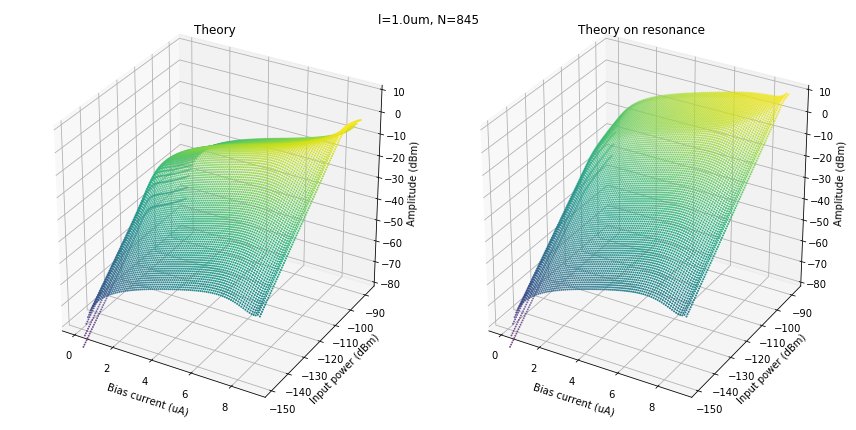

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
axt = fig.add_subplot(221,projection='3d')
axt.scatter(itheo.flatten()/1e-6, xtheo.flatten(), ytheo.flatten(),
                    c=ytheo.flatten(), marker='o',cmap='viridis',clim=(-90,40),s=1)
plt.title('Theory')
axt2 = fig.add_subplot(222,projection='3d')
axt2.scatter(itheo.flatten()/1e-6, xtheo2.flatten(), ytheo2.flatten(),
                 c=ytheo2.flatten(), marker='o',cmap='viridis',clim=(-90,40),s=1)
plt.title('Theory on resonance')
for theax in [axt,axt2]:
#     theax.view_init(20,-70)
#     theax.set_xlim(0,8)
#     theax.set_ylim(-150,-100)
    theax.set_zlim(-80,10)
    theax.set_xlabel('Bias current (uA)')
    theax.set_ylabel('Input power (dBm)')
    theax.set_zlabel('Amplitude (dBm)')

plt.suptitle('l={:.1f}um, N={:.0f}'.format(l/1e-6,N))
plt.tight_layout()
# plt.savefig('sens_plots/amplitude_{:.1f}_{:.0f}.png'.format(l/1e-6,N),bbox_to_inches='tight')
plt.show()
plt.close()

In [6]:
RBW = 5
iac = 10e-9

expnoise2=expnoisemean_log

sens_CPW = iac/np.sqrt(1.065*RBW*10**((ytheo-expnoisemean_log)/10))/1e-12 # in pA/rtHz
sens_CPW2 = iac/np.sqrt(1.065*RBW*10**((ytheo2-expnoisemean_log)/10))/1e-12 # in pA/rtHz

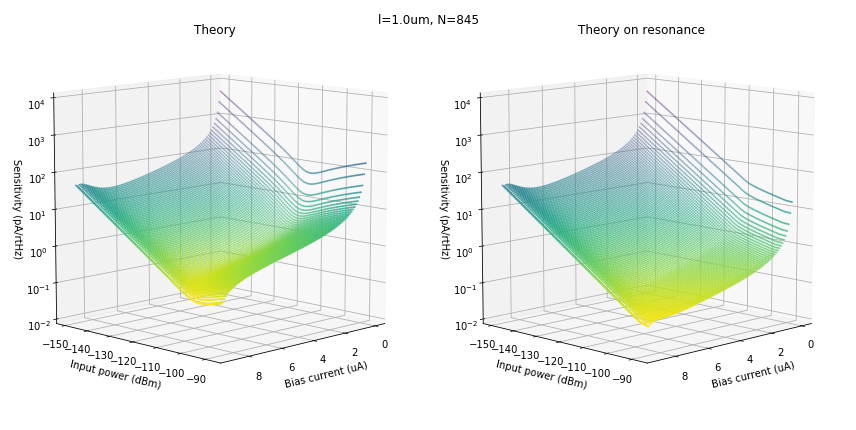

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

fig = plt.figure(figsize=(12,12))

axt = fig.add_subplot(221,projection='3d')
Z = np.log10(sens_CPW)
axt.scatter(itheo.flatten()/1e-6, xtheo.flatten(), Z.flatten(),
            c=Z.flatten(), marker='o',cmap='viridis_r',s=1)#,
plt.title('Theory')

axt2 = fig.add_subplot(222,projection='3d')
Z = np.log10(sens_CPW2)
axt2.scatter(itheo.flatten()/1e-6, xtheo2.flatten(), Z.flatten(),
             c=Z.flatten(), marker='o',cmap='viridis_r',s=1)#,
plt.title('Theory on resonance')

# to scale in log, from https://github.com/matplotlib/matplotlib/issues/209#issuecomment-263227447
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return r"$10^{% .0f}$" % val

for theax in [axt,axt2]:
    theax.view_init(10,45)
    theax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
    theax.set_zlim(-2,4)
    theax.set_xlabel('Bias current (uA)')
    theax.set_ylabel('Input power (dBm)')
    theax.set_zlabel('Sensitivity (pA/rtHz)')

plt.suptitle('l={:.1f}um, N={:.0f}'.format(l/1e-6,N))
plt.tight_layout()
# plt.savefig('sens_plots/sensitivity_{:.1f}_{:.0f}.png'.format(l/1e-6,N),bbox_to_inches='tight')
plt.show()
plt.close()

In [8]:
### FIND MINIMUM SENSITIVITY

print(min(sens_CPW),min(sens_CPW2))

0.14212182688061398 0.04810571477589519


In [9]:
lenI = len(pklfiles)

In [10]:
# reshaping for linecuts
itheo = np.reshape(itheo, (lenI, len(Z)//lenI))
xtheo = np.reshape(xtheo, (lenI, len(Z)//lenI))
xtheo2 = np.reshape(xtheo2, (lenI, len(Z)//lenI))
sens_CPW = np.reshape(sens_CPW, (lenI, len(Z)//lenI))
sens_CPW2 = np.reshape(sens_CPW2, (lenI, len(Z)//lenI))
nphot = np.reshape(nphot, (lenI, len(Z)//lenI))
nphot2 = np.reshape(nphot2, (lenI, len(Z)//lenI))

In [11]:
from matplotlib import cm

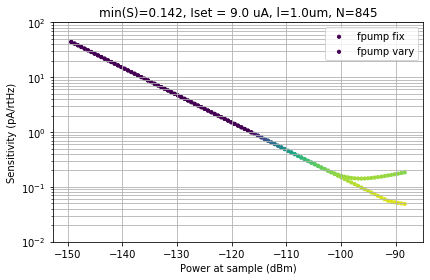

In [12]:
idx_imin,_ = np.unravel_index(sens_CPW.argmin(), sens_CPW.shape)
idx = idx_imin
plt.scatter(xtheo[idx,:],sens_CPW[idx,:],label='fpump fix',c=cm.viridis_r(sens_CPW[idx,:]),s=10)
plt.scatter(xtheo2[idx,:],sens_CPW2[idx,:],label='fpump vary',c=cm.viridis_r(sens_CPW2[idx,:]),s=10)
plt.yscale('log')
plt.title('min(S)={:.3f}, Iset = {:.1f} uA, l={:.1f}um, N={:.0f}'.format(min(sens_CPW[idx,:]),itheo[idx,0]/1e-6,l/1e-6,N))
plt.legend()
plt.ylabel('Sensitivity (pA/rtHz)')
plt.xlabel('Power at sample (dBm)')
plt.tight_layout()
plt.ylim(1e-2,1e2)
# plt.xlim(-152,-96)
plt.grid(which='both')
# plt.savefig('sens_plots/min_sensitivity_{:05.1f}_{:.0f}_{:.1f}.png'.format(l/1e-6,N,itheo[idx,0]/1e-6),bbox_to_inches='tight')
plt.show()
plt.close()

In [13]:
### FINAL EXPORT
mypkl2D = {
    'x': itheo.flatten()/1e-6,
    'y': xtheo.flatten(),
    'z': sens_CPW.flatten(),
    'y2': xtheo2.flatten(),
    'z2': sens_CPW2.flatten(),
    'xlabel':r'Bias current (µA)',
    'ylabel':r'Input power (dBm)',
    'zlabel':r'Sensitivity (pA/rtHz)',
          }

mypkl1D = {
    'x': xtheo[idx,:],
    'x2': xtheo2[idx,:],
    'y': sens_CPW[idx,:],
    'y2': sens_CPW2[idx,:],
    'xlabel':r'Input power (dBm)',
    'ylabel':r'Sensitivity (pA/rtHz)',
    'n':nphot[idx,:],
    'n2':nphot2[idx,:],
    'nlabel':'Intracavity photon number ()',
          }

pickle.dump(mypkl2D,open('data_final/JJ_CPW_2D_{:05.1f}_{:.0f}.pkl'.format(l/1e-6,N),'wb'))
pickle.dump(mypkl1D,open('data_final/JJ_CPW_1D_{:05.1f}_{:.0f}.pkl'.format(l/1e-6,N),'wb'))

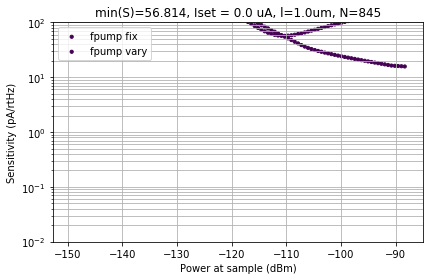

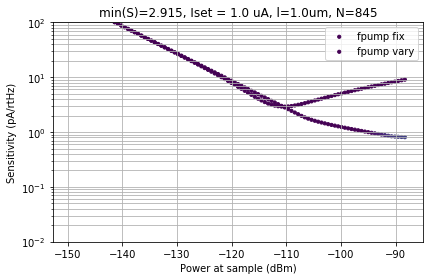

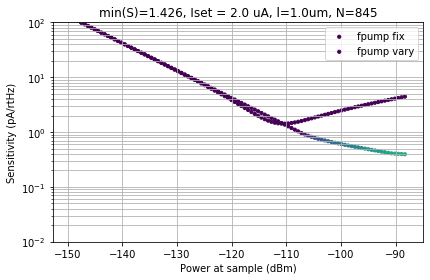

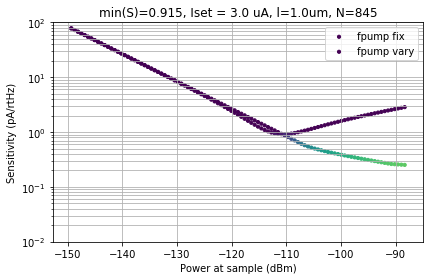

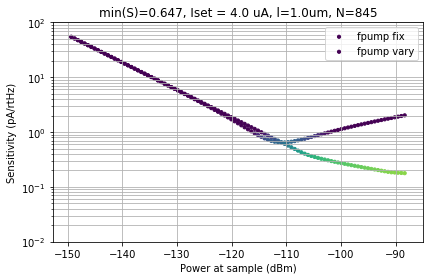

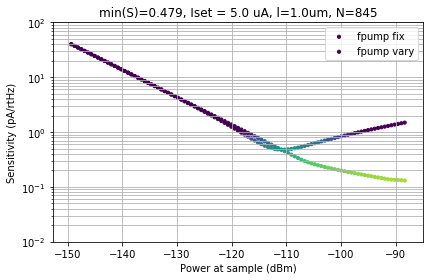

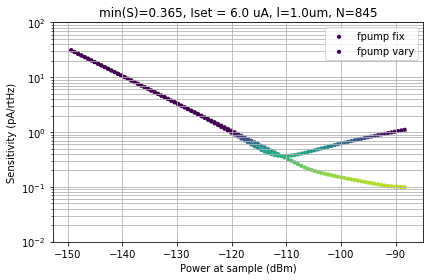

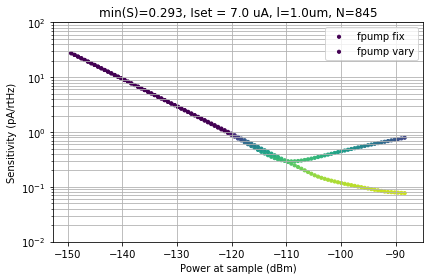

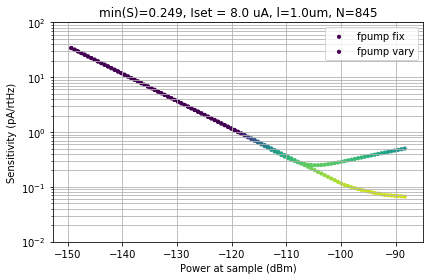

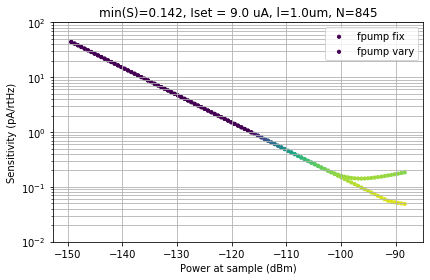

In [14]:
for fixI in [0e-6,1e-6,2e-6,3e-6,4e-6,5e-6,6e-6,7e-6,8e-6,9e-6]: # otherwise 4.999999996e-6
    idx_imin,_ = np.unravel_index(sens_CPW.argmin(), sens_CPW.shape)
    idx = int(np.where(itheo[:,0]==fixI)[0])
    plt.scatter(xtheo[idx,:],sens_CPW[idx,:],label='fpump fix',c=cm.viridis_r(sens_CPW[idx,:]),s=10)
    plt.scatter(xtheo2[idx,:],sens_CPW2[idx,:],label='fpump vary',c=cm.viridis_r(sens_CPW2[idx,:]),s=10)
    plt.yscale('log')
    plt.title('min(S)={:.3f}, Iset = {:.1f} uA, l={:.1f}um, N={:.0f}'.format(min(sens_CPW[idx,:]),itheo[idx,0]/1e-6,l/1e-6,N))
    plt.legend()
    plt.ylabel('Sensitivity (pA/rtHz)')
    plt.xlabel('Power at sample (dBm)')
    plt.tight_layout()
    plt.ylim(1e-2,1e2)
    # plt.xlim(-152,-96)
    plt.grid(which='both')
#     plt.savefig('sens_plots/min_sensitivity_{:05.1f}_{:.0f}_{:.1f}.png'.format(l/1e-6,N,itheo[idx,0]/1e-6),bbox_to_inches='tight')
    plt.show()
    plt.close()